In [1]:
%load_ext autoreload
%autoreload 2

In [49]:
!unzip -o inputs.zip -d .

Archive:  inputs.zip
   creating: ./inputs
  inflating: ./__MACOSX/._inputs     
  inflating: ./inputs/newspapers_overview_20220926.csv  
  inflating: ./__MACOSX/inputs/._newspapers_overview_20220926.csv  
  inflating: ./inputs/raw_annotations_KB.csv  
  inflating: ./__MACOSX/inputs/._raw_annotations_KB.csv  
  inflating: ./inputs/PolLabelReclassification - label_reclassification.csv  
  inflating: ./__MACOSX/inputs/._PolLabelReclassification - label_reclassification.csv  
  inflating: ./inputs/MPD_export_1846_1920_20230504.csv  
  inflating: ./__MACOSX/inputs/._MPD_export_1846_1920_20230504.csv  


In [3]:
from tools.analysis_tools import DataBlender
import ruptures as rpt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

## Intermezzo: add Category column 

In [4]:
path_directories = 'inputs/MPD_export_1846_1920_20230504.csv'
path_newspaper = 'inputs/newspapers_overview_20220926.csv'
path_annotations = 'inputs/raw_annotations_KB.csv'

blender = DataBlender.load_data(path_directories, path_newspaper,path_annotations)
blender


In [5]:
blender.directories.CATEGORY.unique()

array(['london', 'provincial', 'welsh', 'scottish', 'irish', 'railway',
       'isles'], dtype=object)

In [6]:
blender.directories.shape

(92266, 31)

In [7]:
blender.directories = blender.directories[
                            blender.directories.CATEGORY.isin(
                                    ['london', 'provincial', 'welsh', 'scottish',]
                                )
                            ]

In [8]:
blender.complete_records_in_directories('S-POL')

Before:  71431
After:  75105


In [10]:
pol_label_path = 'inputs/PolLabelReclassification - label_reclassification.csv'
target_col = 'label_alt'
blender.recode_political_labels(pol_label_path, target_col)

In [11]:
blender.directories.Leaning.unique()

array(['nan', 'liberal', 'radical', 'neutral', 'conservative',
       'independent', 'other', 'religious', 'national'], dtype=object)

In [12]:
sum(blender.directories.Leaning.isin(['liberal', 'neutral', 'conservative','independent'])) /blender.directories.shape[0]

0.8776760228353948

<Axes: xlabel='year'>

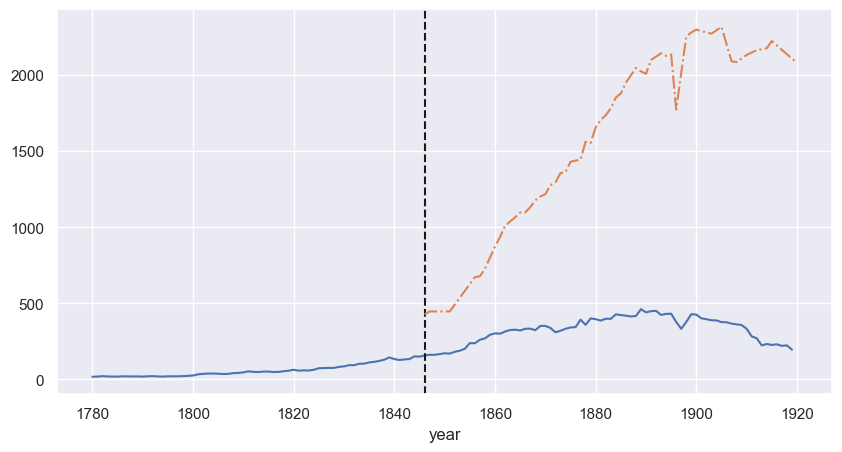

In [13]:
blender.plot_corpus_timeline(with_links=False, with_directories=True)


<Axes: xlabel='year'>

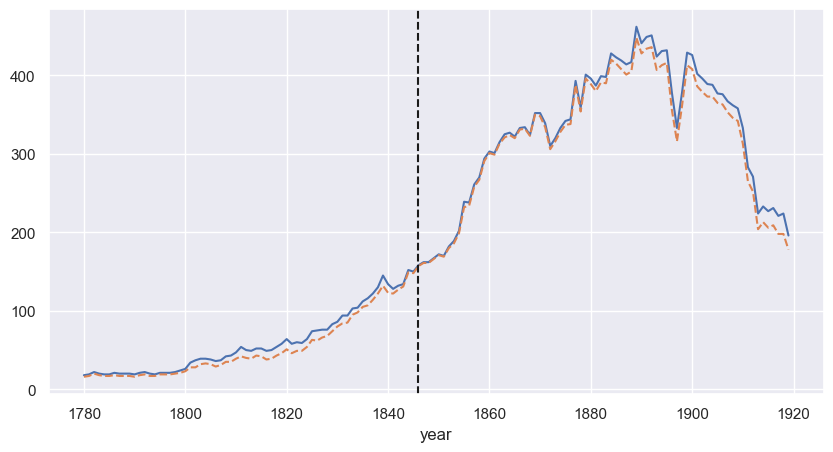

In [14]:
blender.plot_corpus_timeline(with_links=True, with_directories=False)


In [15]:
len(blender.digital_papers.NLP.unique())

1450

In [16]:
blender.directories.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'index', 'id', 'chain_id', 'S-TITLE',
       'D-EST', 'S-POL', 'S-PRICE', 'DISTRICT', 'DISTRICT_PUB', 'COUNTY',
       'D-PUB', 'E-LOC', 'E-ORG', 'E-PER', 'TEXT', 'DISTRICT_DESCRIPTION',
       'year', 'original', 'district', 'county', 'wiki_id', 'district_first',
       'linking_code', 'wikidata_id', 'latitude', 'longitude', 'hcounties',
       'places_georefenced', 'CATEGORY', 'value_S-POL_source_idx', 'Leaning'],
      dtype='object')

In [17]:
blender.directories.Leaning = blender.directories.Leaning.astype(str)
blender.directories.Leaning = blender.directories.Leaning.str.strip()

In [18]:
blender.add_directories_to_newspapers()

{'CID_003476', 'CID_005311', 'CID_000988', 'CID_000993', 'CID_000065', 'CID_002939', 'CID_003174', 'CID_000407', 'CID_001705', 'CID_002010', 'CID_000061', 'CID_000378', 'CID_001638', 'CID_000436', 'CID_000062', 'CID_003712', 'CID_001895', 'CID_006223', 'CID_001237', 'CID_001893', 'CID_004102', 'CID_000256', 'CID_007231', 'CID_000060', 'CID_000066', 'CID_000401', 'CID_001902', 'CID_004095', 'CID_001821', 'CID_002661', 'CID_000688', 'CID_001116', 'CID_001533', 'MPD_1858_745', 'CID_007520', 'CID_001578', 'CID_000124', 'CID_002009', 'CID_003439', 'CID_000521', 'CID_000757', 'CID_000589', 'CID_000639', 'CID_000641'}


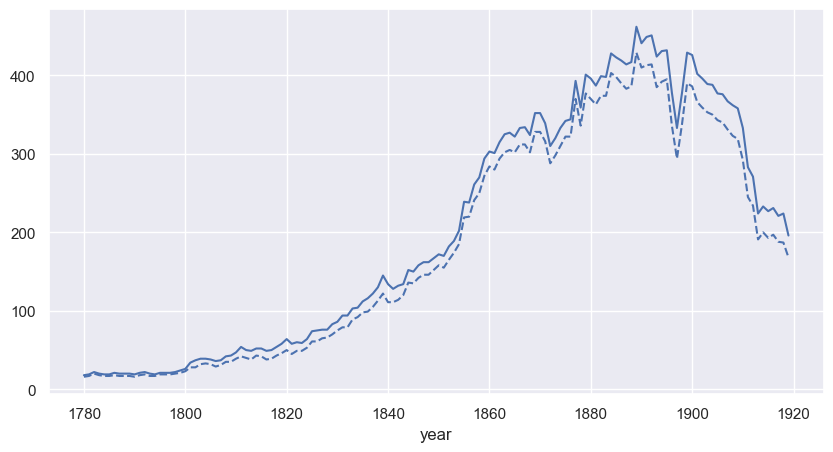

In [19]:
# check
blender.digital_papers_by_year[blender.digital_papers_by_year.year.isin(range(1780,1920))].groupby('year')['NLP'].count().plot(figsize=(10,5),style=['b-'])
ax = blender.digital_papers_by_year[blender.digital_papers_by_year.year.isin(range(1780,1920)) & (~blender.digital_papers_by_year.npd_id.isnull())].groupby('year')['NLP'].count().plot(style=['b--'])


<Axes: xlabel='year'>

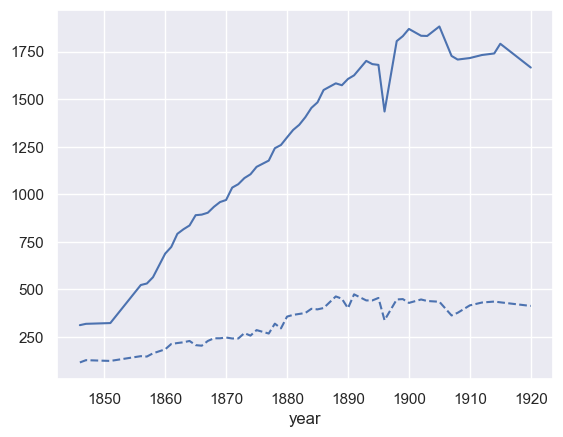

In [20]:
blender.directories[blender.directories.COUNTY!='london'].groupby('year')['id'].count().plot(style=['b-'])
blender.directories[blender.directories.COUNTY=='london'].groupby('year')['id'].count().plot(style=['b--'])

In [21]:
blender.merge_directories_and_newspapers()

{'CID_003476', 'CID_005311', 'CID_000988', 'CID_000993', 'CID_000065', 'CID_002939', 'CID_003174', 'CID_000407', 'CID_001705', 'CID_002010', 'CID_000061', 'CID_000378', 'CID_001638', 'CID_000436', 'CID_000062', 'CID_003712', 'CID_001895', 'CID_006223', 'CID_001237', 'CID_001893', 'CID_004102', 'CID_000256', 'CID_007231', 'CID_000060', 'CID_000066', 'CID_000401', 'CID_001902', 'CID_004095', 'CID_001821', 'CID_002661', 'CID_000688', 'CID_001116', 'CID_001533', 'MPD_1858_745', 'CID_007520', 'CID_001578', 'CID_000124', 'CID_002009', 'CID_003439', 'CID_000521', 'CID_000757', 'CID_000589', 'CID_000639', 'CID_000641'}


In [22]:
blender.data[
    blender.data.year.isin(blender.directories.year.unique()) & blender.data.CATEGORY.isin(['london', 'provincial', 'welsh', 'scottish'])
                ].shape[0] /blender.directories.shape[0]  


0.20034490960989534

<Axes: xlabel='year'>

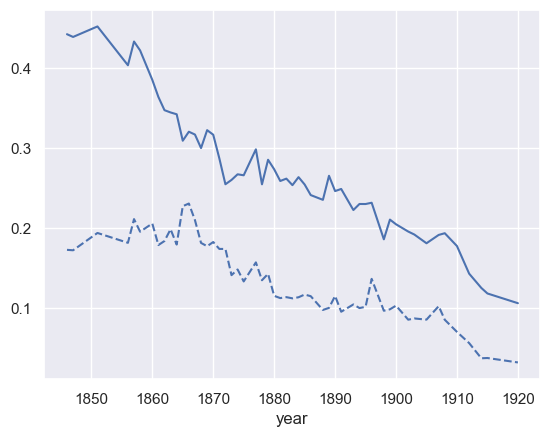

In [23]:
total = blender.directories[blender.directories.COUNTY!='london'].groupby('year')['id'].count()
digital = blender.data[(blender.data.DISTRICT_PUB!='london') & (blender.data.year.isin(blender.directories.year.unique()))].groupby('year')['NLP'].count()
(digital/total).plot(style=['b-'])

total = blender.directories[blender.directories.COUNTY=='london'].groupby('year')['id'].count()
digital =  blender.data[( blender.data.DISTRICT_PUB=='london') & ( blender.data.year.isin(blender.directories.year.unique()))].groupby('year')['NLP'].count()
(digital/total).plot(style=['b--'])

<Axes: ylabel='Leaning'>

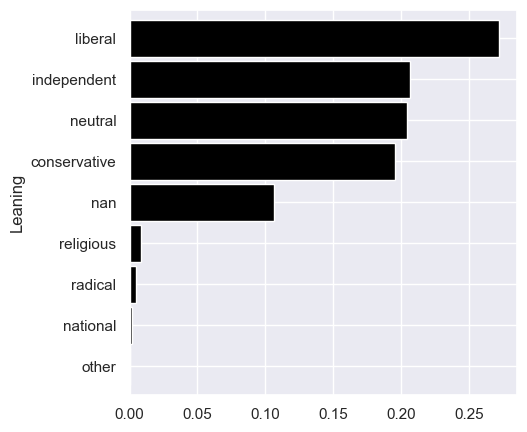

In [24]:

nominator = blender.directories['Leaning'].value_counts()
denominator = nominator.sum()
(nominator / denominator).sort_values().plot(kind='barh',color='black',width=.9,figsize=(5,5))

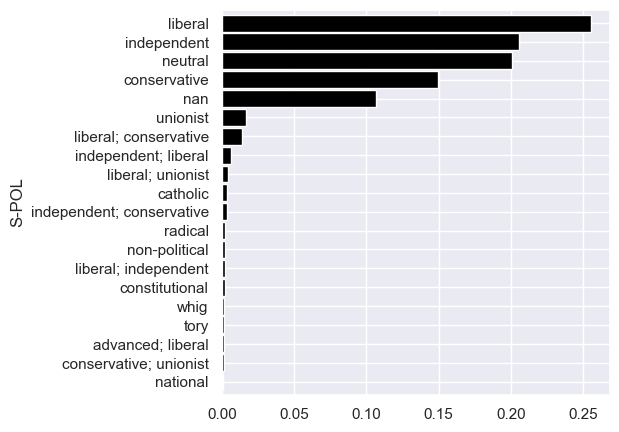

In [25]:

nominator = blender.directories['S-POL'].value_counts()
denominator = nominator.sum()
fig, ax = plt.subplots(figsize=(5,5))
(nominator / denominator)[:20].sort_values().plot(kind='barh',color='black',width=.9, ax=ax)
fig.savefig("/Users/kasparbeelen/Documents/LwM/es_book_chapter/second_try/Figure_4.png", bbox_inches='tight',dpi=1000)

In [26]:
include_values = ['conservative','liberal','neutral','independent']
include_values = ['nan', 'liberal', 'radical', 'neutral', 'conservative','independent'] # handle 'cosmopolitan' 'protestant' later
distribution_newspapers,distribution_directories = blender.distributions_by_year('Leaning',include_values)



Leaning
liberal         8232
conservative    5526
neutral         4059
independent     3512
other           2094
nan              719
radical          215
Name: count, dtype: int64 ['conservative' 'liberal' 'independent' 'other' 'radical' 'neutral' 'nan']
Leaning
liberal         22843
independent     17372
neutral         17152
conservative    16428
nan              8975
other             892
radical           418
Name: count, dtype: int64 ['nan' 'liberal' 'radical' 'neutral' 'conservative' 'independent' 'other']


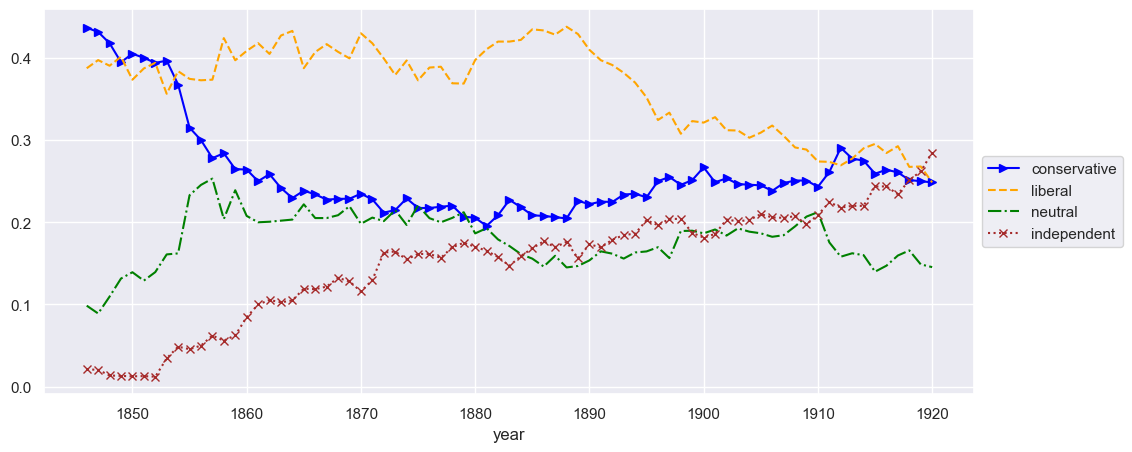

In [27]:
# try to make it more reabable
order = ['conservative','liberal','neutral','independent']
ax = distribution_newspapers[order].plot(style=['>-','--','-.','x:'], figsize=(12,5), color = ['blue','orange','green','brown']) # color='black'
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

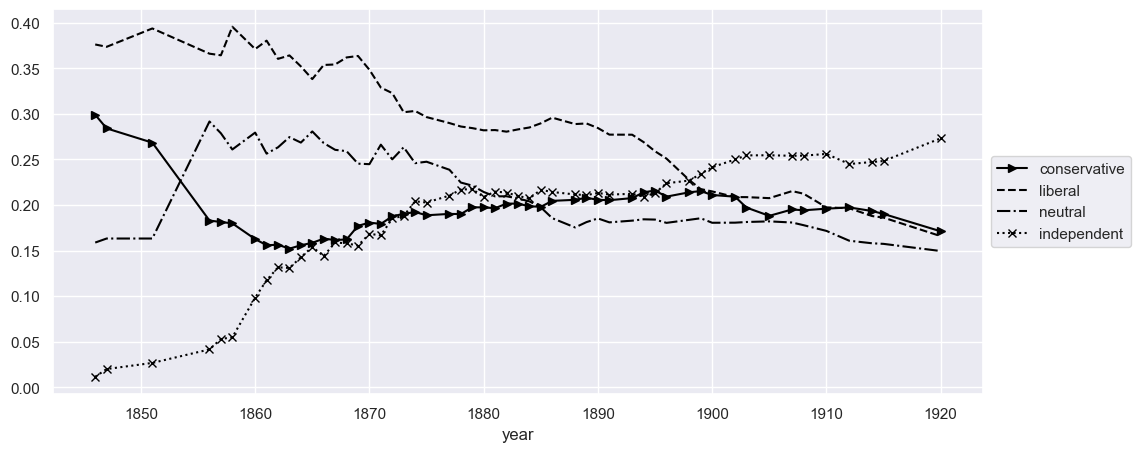

In [28]:
ax = distribution_directories[order].plot(style=['>-','--','-.','x:'], figsize=(12,5), color='black')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Leaning
liberal         8232
conservative    5526
neutral         4059
independent     3512
other           2094
nan              719
radical          215
Name: count, dtype: int64 ['conservative' 'liberal' 'independent' 'other' 'radical' 'neutral' 'nan']
Leaning
liberal         22843
independent     17372
neutral         17152
conservative    16428
nan              8975
other             892
radical           418
Name: count, dtype: int64 ['nan' 'liberal' 'radical' 'neutral' 'conservative' 'independent' 'other']


<Axes: >

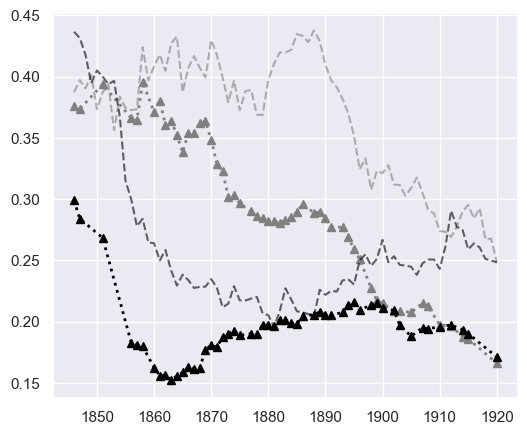

In [31]:

target_labels = ['liberal','conservative']
#colors = ['orange','blue']
colors = ['gray','black']
blender.compare_proportions_for_labels('Leaning',target_labels,colors,include_values)


Leaning
liberal         8232
conservative    5526
neutral         4059
independent     3512
other           2094
nan              719
radical          215
Name: count, dtype: int64 ['conservative' 'liberal' 'independent' 'other' 'radical' 'neutral' 'nan']
Leaning
liberal         22843
independent     17372
neutral         17152
conservative    16428
nan              8975
other             892
radical           418
Name: count, dtype: int64 ['nan' 'liberal' 'radical' 'neutral' 'conservative' 'independent' 'other']


<Axes: >

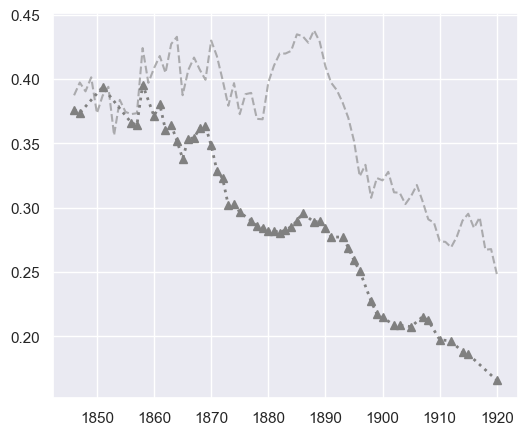

In [32]:

target_labels = ['liberal']
#colors = ['orange','blue']
colors = ['gray']
blender.compare_proportions_for_labels('Leaning',target_labels,colors,include_values)


Leaning
liberal         8232
conservative    5526
neutral         4059
independent     3512
other           2094
nan              719
radical          215
Name: count, dtype: int64 ['conservative' 'liberal' 'independent' 'other' 'radical' 'neutral' 'nan']
Leaning
liberal         22843
independent     17372
neutral         17152
conservative    16428
nan              8975
other             892
radical           418
Name: count, dtype: int64 ['nan' 'liberal' 'radical' 'neutral' 'conservative' 'independent' 'other']


<Axes: >

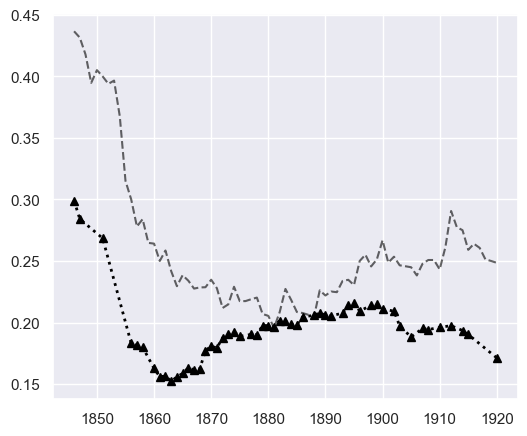

In [33]:

target_labels = ['conservative']
#colors = ['orange','blue']
colors = ['black']
blender.compare_proportions_for_labels('Leaning',target_labels,colors,include_values)


Leaning
liberal         8232
conservative    5526
neutral         4059
independent     3512
other           2094
nan              719
radical          215
Name: count, dtype: int64 ['conservative' 'liberal' 'independent' 'other' 'radical' 'neutral' 'nan']
Leaning
liberal         22843
independent     17372
neutral         17152
conservative    16428
nan              8975
other             892
radical           418
Name: count, dtype: int64 ['nan' 'liberal' 'radical' 'neutral' 'conservative' 'independent' 'other']


<Axes: >

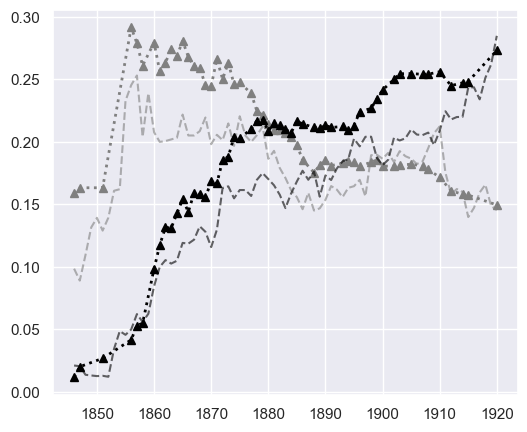

In [34]:

target_labels = ['neutral','independent']
#colors = ['green','red']
colors = ['gray','black']
blender.compare_proportions_for_labels('Leaning',target_labels,colors,include_values)


Leaning
liberal         8232
conservative    5526
neutral         4059
independent     3512
other           2094
nan              719
radical          215
Name: count, dtype: int64 ['conservative' 'liberal' 'independent' 'other' 'radical' 'neutral' 'nan']
Leaning
liberal         22843
independent     17372
neutral         17152
conservative    16428
nan              8975
other             892
radical           418
Name: count, dtype: int64 ['nan' 'liberal' 'radical' 'neutral' 'conservative' 'independent' 'other']


<Axes: >

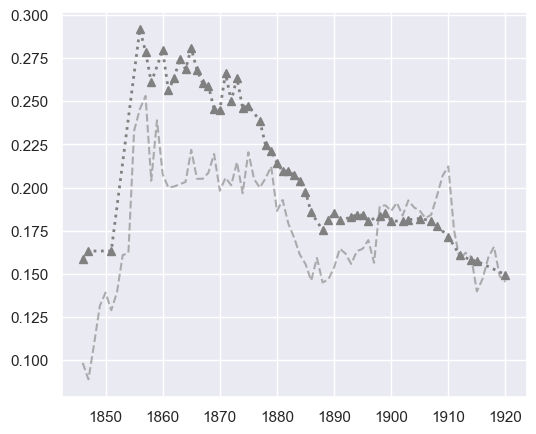

In [35]:

target_labels = ['neutral']
#colors = ['green','red']
colors = ['gray']
blender.compare_proportions_for_labels('Leaning',target_labels,colors,include_values)


Leaning
liberal         8232
conservative    5526
neutral         4059
independent     3512
other           2094
nan              719
radical          215
Name: count, dtype: int64 ['conservative' 'liberal' 'independent' 'other' 'radical' 'neutral' 'nan']
Leaning
liberal         22843
independent     17372
neutral         17152
conservative    16428
nan              8975
other             892
radical           418
Name: count, dtype: int64 ['nan' 'liberal' 'radical' 'neutral' 'conservative' 'independent' 'other']


<Axes: >

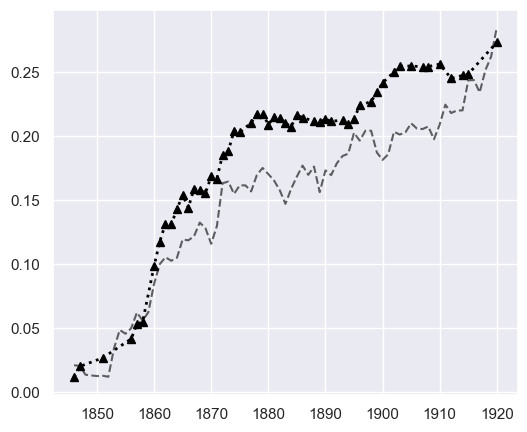

In [36]:

target_labels = ['independent']
#colors = ['green','red']
colors = ['black']
blender.compare_proportions_for_labels('Leaning',target_labels,colors,include_values)


/Users/kasparbeelen/Documents/LwM/whose_news/whose_news/tools/analysis_tools.py:571: RuntimeWarning: divide by zero encountered in log
  bias_contribution_dict[label][year] = p*np.log(2*p / (p+q))
/Users/kasparbeelen/Documents/LwM/whose_news/whose_news/tools/analysis_tools.py:571: RuntimeWarning: invalid value encountered in scalar multiply
  bias_contribution_dict[label][year] = p*np.log(2*p / (p+q))
/Users/kasparbeelen/Documents/LwM/whose_news/whose_news/tools/analysis_tools.py:571: RuntimeWarning: divide by zero encountered in log
  bias_contribution_dict[label][year] = p*np.log(2*p / (p+q))
/Users/kasparbeelen/Documents/LwM/whose_news/whose_news/tools/analysis_tools.py:571: RuntimeWarning: invalid value encountered in scalar multiply
  bias_contribution_dict[label][year] = p*np.log(2*p / (p+q))
/Users/kasparbeelen/Documents/LwM/whose_news/whose_news/tools/analysis_tools.py:571: RuntimeWarning: divide by zero encountered in log
  bias_contribution_dict[label][year] = p*np.log(2*p / 

<Axes: >

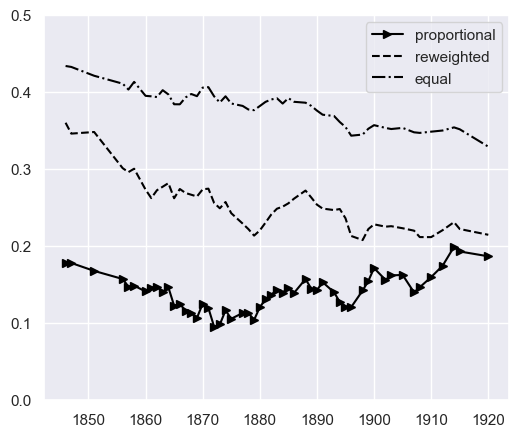

In [37]:

bd,bc,timeline, dist_pop = blender.bias_over_time(distribution_newspapers,distribution_directories)
bd_eq,bc_eq,timeline,dist_pop_eq = blender.bias_over_time(distribution_newspapers,distribution_directories, method = 'equal')
bd_p,bc_pe,timeline_, distp_pop_pe = blender.bias_over_time(distribution_newspapers,distribution_directories, 'penalized', p = 100, col = 'Leaning')

pd.DataFrame([bd,bd_p,bd_eq],index=['proportional','reweighted','equal']).T.plot(style=['>-','--','-.'],
                                     ylim = (0,0.5),
                                     figsize=(6,5), color='black')

<Axes: xlabel='year'>

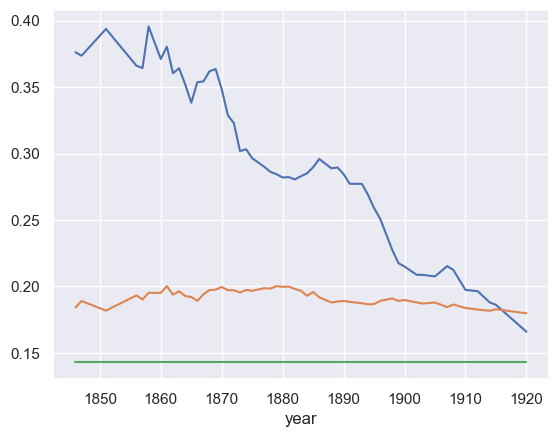

In [38]:
label = 'liberal'
dist_pop[label].plot()
distp_pop_pe[label].plot()
dist_pop_eq[label].plot()

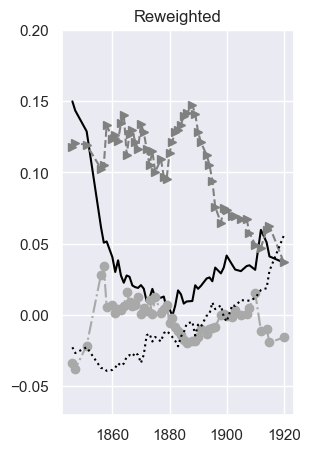

In [39]:
target_dict,title,legend = bc_eq,'Equal',True
#target_dict,title,legend = bc,'Proportional',False
target_dict,title,legend = bc_pe,'Reweighted',False

labels = ['conservative','liberal','neutral','independent']

ax = pd.DataFrame(
    [target_dict[l] for l in labels],
    index = labels
        ).T.plot(
            figsize=(3,5),
            style=['-','>--','o-.',':'],
            #style=['-','--','-.',':'],
            color=['black','grey','darkgrey','black'],
            #color=['blue','orange','green','brown'],
            title=title,
            ylim=(-0.07, 0.2),
            legend=legend,
)
if legend:
    ax.legend(loc='lower center', bbox_to_anchor=(.5, -0.5))

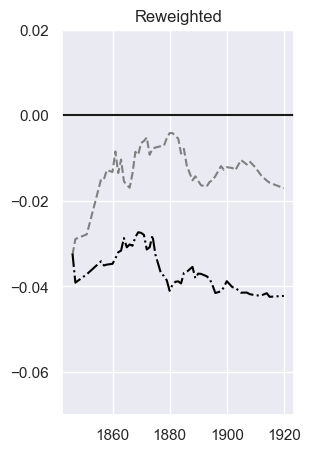

In [40]:
target_dict,title,legend = bc_eq,'Equal',True
target_dict,title,legend = bc,'Proportional',False
target_dict,title,legend = bc_pe,'Reweighted',False

labels = ['radical','nan']

ax = pd.DataFrame(
    [target_dict[l] for l in labels],
    index = labels
        ).T.plot(
            figsize=(3,5),
            style=['--','-.'],
            color=['grey','black'],
            title=title,
            ylim=(-0.07, 0.02),
            legend=legend,
)
if legend:
    ax.legend(loc='lower center', bbox_to_anchor=(.5, -0.5))
    
ax.axhline(0, color='k', linestyle='-')

In [41]:
blender.add_chrono_nlp()

In [42]:
include_values

['nan', 'liberal', 'radical', 'neutral', 'conservative', 'independent']

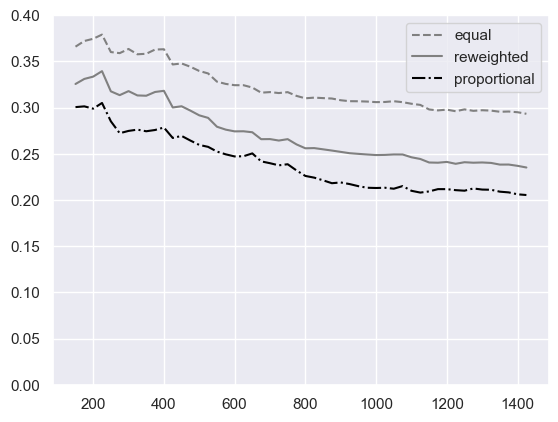

In [43]:
include_values = ['liberal','conservative','neutral','independent','radical']
#include_values = ['conservative','liberal','neutral','independent']
include_values = ['nan', 'liberal', 'radical', 'neutral', 'conservative','independent'] # handle 'cosmopolitan' 'protestant' later


print_breaks = False
representation = ['equal','reweighted','proportional']
styles = ['--','-','-.']
colors = ['grey','grey','black']


df_bias = pd.DataFrame(
    [blender.bias_digitization('Leaning',include_values,p,step_size = 25) for p in representation],
    index = representation
                ).T
ax = df_bias.plot(
                    style=styles,
                    color=colors,
                    ylim= (.0,.4)
                        )


costfunction = 'l1' # Try also 'l2' and 'rbf'
jump = 1
pen = 0.75
breaks = []
df_bias.fillna(.0, inplace=True)
for p in df_bias.columns:
    series = df_bias[p]
    y = np.array(series.tolist()); y
    model = rpt.Pelt(model=costfunction,jump=jump)
    model.fit(y)
    breaks.append(model.predict(pen=pen))

if print_breaks:
    for i,break_points in enumerate(breaks):
        print(representation[i], break_points)
    
        for br in break_points:
            if (br > 6) and (br < 58):
                ax.axvline(df_bias.iloc[br].name, color=colors[i], linestyle=styles[i])


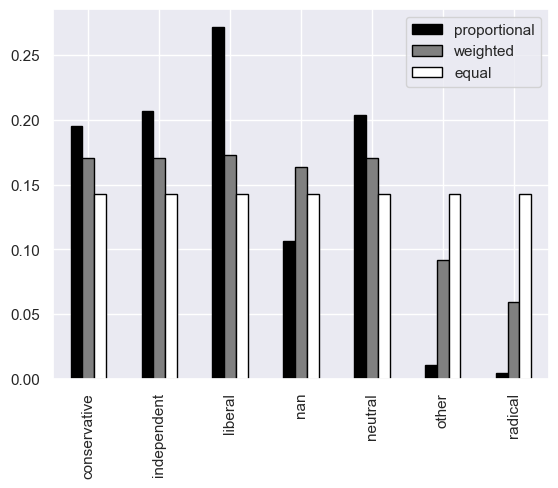

In [44]:
#selected_labels = ['liberal','conservative','neutral','independent','radical']
prop_df = blender.compare_target_distributions('Leaning',include_values)
# patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
ax = prop_df[['proportional','weighted','equal']
                ].plot(kind='bar',color=['black','grey','white'],
                edgecolor='black'
                                                      )


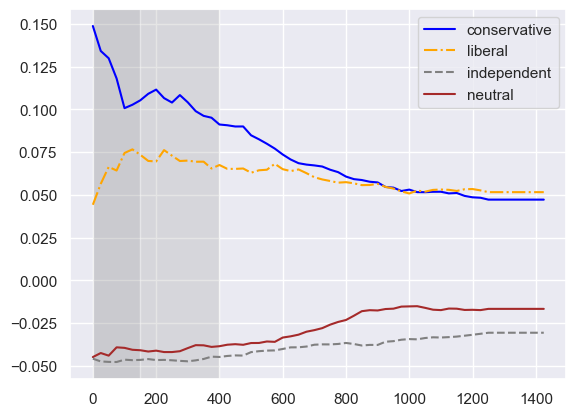

In [46]:
method = 'kl'
target_dist = 'proportional'
step_size = 25
parties = ['conservative','liberal','independent','neutral']

ax = pd.DataFrame(
    [blender.bias_digitization_by_value('Leaning',p,
                                       target_dist=target_dist,
                                       method=method,
                                       step_size=step_size)
                                            for p in parties],
                            index = parties
                                                
                                ).T.plot(
                                    style = ['-','-.','--','-'],
                                    color = ['blue','orange','grey','brown'],
                                    #figsize = (7,5)
                                    )

ax.axvspan(0, 150, facecolor='grey', alpha=0.3)
ax.axvspan(150, 400, facecolor='darkgrey', alpha=0.3)

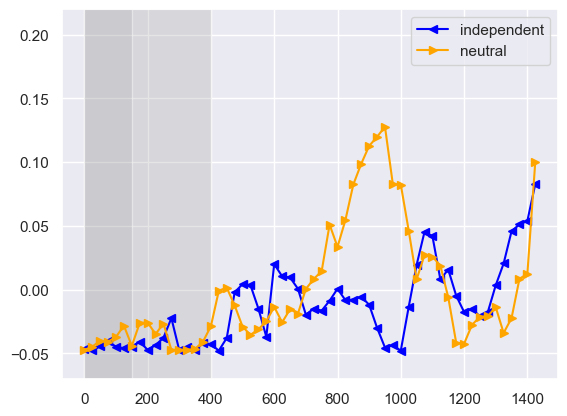

In [47]:
method = 'kl'
target_dist = 'proportional'
batch_level = True
parties = ['conservative','liberal']
parties = ['independent','neutral']

ax = pd.DataFrame([blender.bias_digitization_by_value(
                'Leaning',p,
                target_dist=target_dist,
                batch_level=batch_level,
                method=method,
                step_size=25,
                window=100)
                    for p in parties],
                index=parties
                ).T.plot(
                    style = ['<-','>-'],
                    color = ['blue','orange'],
                    ylim = (-.07,.22)
                    )
#ax.axvline(200, color='k', linestyle='--')
#ax.axvline(400, color='k', linestyle='--')
ax.axvspan(0, 150, facecolor='grey', alpha=0.3)
ax.axvspan(150, 400, facecolor='darkgrey', alpha=0.3)
#blender.bias_digitization_by_value('Leaning','liberal',target_dist=target_dist,batch_level=batch_level,method=method,step_size=25).plot()
